In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import factor_analyzer as factor

## Análisis Factorial con `factor_analizer`

Este es el código de la lectura de Dimensionalidad adaptado para que funcione con la librería `factor_analizer` versión 0.3.1

Con los cambios en la sintaxis esta librería es totalmente compatible con `scikit-learn`.

In [2]:
df = pd.read_csv('data/cep45.csv')
df.head()

,corr,filtro,psu,region,p1_1,p1_2,p1_3,p2,p3,p4,...,de14_b,de14_c,de14_d,de14_e,de14_f,de15,de16,de17,b5,pond
0,1,937,150,13,9,3,6,1,3,2,...,2,2,2,2,2,6,4,4,1,0.782461
1,2,938,150,13,7,6,3,2,2,1,...,2,2,1,2,2,8,4,4,1,1.157864
2,3,939,150,13,3,6,9,2,2,3,...,2,2,2,2,2,9,6,4,1,1.204037
3,4,1096,182,13,3,4,11,3,2,2,...,2,2,2,2,2,6,3,3,1,1.025330
4,5,1097,182,13,6,11,7,3,1,1,...,2,2,2,2,2,6,3,3,1,1.204037


In [3]:
# filtamos las columnas
trust_df = df.filter(regex="p17_*")
trust_df = trust_df.rename(columns={'p17_a': 'I.Catolica', 'p17_b': 'I.Evangelica', 'p17_c': 'FFAA', 'p17_d':
'Justicia',
'p17_e': 'Prensa', 'p17_f': 'Television', 'p17_g':'Sindicatos', 'p17_h':'Carabineros',
'p17_i': 'Gobierno', 'p17_j': 'PartidosPol', 'p17_k': 'Congreso', 'p17_l':'Empresas',
'p17_m':'Universidades', 'p17_n':'Radio'})

In [4]:
import factor_analyzer.factor_analyzer as fact
fact.calculate_bartlett_sphericity(trust_df)

(6644.83570591191, 0.0)

In [5]:
fact.calculate_kmo(trust_df)

(array([0.93853431, 0.92717654, 0.93176781, 0.95285454, 0.91971575,
        0.88552639, 0.93671982, 0.91120486, 0.93981619, 0.91291311,
        0.91928052, 0.94234885, 0.95178434, 0.93221226]), 0.927465719411128)

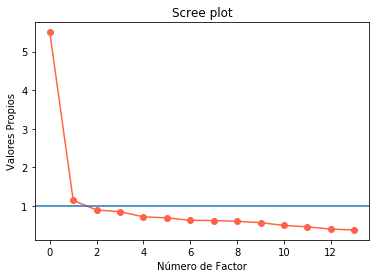

In [6]:
factorize = fact.FactorAnalyzer(n_factors=2, method='principal')
factorize.fit(trust_df)
factor_screeplot = factorize.get_eigenvalues()[0]
plt.plot(np.arange(len(factor_screeplot)), factor_screeplot, 'o-', color='tomato')
plt.xlabel('Número de Factor')
plt.ylabel('Valores Propios')
plt.axhline(1)
plt.title("Scree plot");

In [7]:
factor_loadings = pd.DataFrame(factorize.loadings_)
factor_loadings.set_index(trust_df.columns, inplace=True)
factor_loadings.columns = ['Factor1', 'Factor2']
factor_loadings

,Factor1,Factor2
I.Catolica,-0.112771,0.719162
I.Evangelica,-0.021686,0.474913
FFAA,0.370507,0.368499
Justicia,0.534044,0.181139
Prensa,0.325933,0.418654
Television,-0.057088,0.803767
Sindicatos,0.804909,-0.236597
Carabineros,-0.056070,0.752123
Gobierno,0.474229,0.317161
PartidosPol,0.790016,-0.030551


In [8]:
factor_loadings.applymap(lambda x: np.where(x < .4, ' ', round(x, 2)))

,Factor1,Factor2
I.Catolica,,0.72
I.Evangelica,,0.47
FFAA,,
Justicia,0.53,
Prensa,,0.42
Television,,0.8
Sindicatos,0.8,
Carabineros,,0.75
Gobierno,0.47,
PartidosPol,0.79,


Text(0, 0.5, 'Factor 2: 0.21')

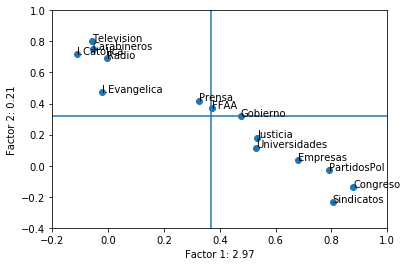

In [9]:
# guardemos la varianza explicada por cada dimensión
factor_var = factorize.get_factor_variance()
# cruzamos ambos factores
plt.plot(factor_loadings.Factor1, factor_loadings.Factor2,'o')
plt.xlim((-.2,1)) # definimos límites
plt.ylim((-.4, 1))
# Para cada elemento en los factores
for i, txt in enumerate(factor_loadings.index):
    # anotemos el nombre de la variable
    plt.annotate(txt, (factor_loadings['Factor1'][i],
    factor_loadings['Factor2'][i]))
# Grafiquemos la media de ambos factores
plt.axvline(factor_loadings['Factor1'].mean())
plt.axhline(factor_loadings['Factor2'].mean())
# Reportemos la varianza de cada dimensión
plt.xlabel('Factor 1: {}'.format(round(factor_var[0][1], 2)))
plt.ylabel('Factor 2: {}'.format(round(factor_var[1][1], 2)))

In [10]:
factor_var = pd.DataFrame(np.asarray(factorize.get_factor_variance()))
factor_var.index = ['SS loadings (Variance)', 'Proportional variance', 'Cumulative variance']
factor_var.columns = ['Factor1', 'Factor2']
factor_var

,Factor1,Factor2
SS loadings (Variance),3.562042,2.970976
Proportional variance,0.254432,0.212213
Cumulative variance,0.254432,0.466644


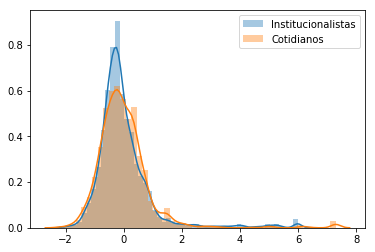

In [11]:
extract_factor_scores = factorize.transform(trust_df)
sns.distplot(extract_factor_scores[:, 0], label="Institucionalistas")
sns.distplot(extract_factor_scores[:, 1], label="Cotidianos")
plt.legend()